In [10]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [11]:
'''
each column represent the one light source in the ppg sensor
sampling rate is 24 samples per second which is ideal as the ppg relies between 0.5 and 5hz
'''

data = pd.read_csv('0000.csv', index_col= '1649438306')
data.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3
1649438306,,,
98,74722.0,252665.0,264880.0
98,74761.0,252726.0,264924.0
98,74801.0,252745.0,264944.0
98,74787.0,252654.0,264851.0
98,74706.0,252366.0,264568.0


In [38]:
data['Unnamed: 1'].min(), data['Unnamed: 1'].max(), data['Unnamed: 1'].mean()

(70033.0, 80847.0, 75606.92574199806)

In [39]:
data['Unnamed: 2'].min(), data['Unnamed: 2'].max(), data['Unnamed: 2'].mean()

(238400.0, 279631.0, 257000.50285160038)

In [40]:
data['Unnamed: 3'].min(), data['Unnamed: 3'].max(), data['Unnamed: 3'].mean()

(252289.0, 303158.0, 274402.1816876819)

### plots of the three channels before filtering

Text(0, 0.5, 'Amplitude')

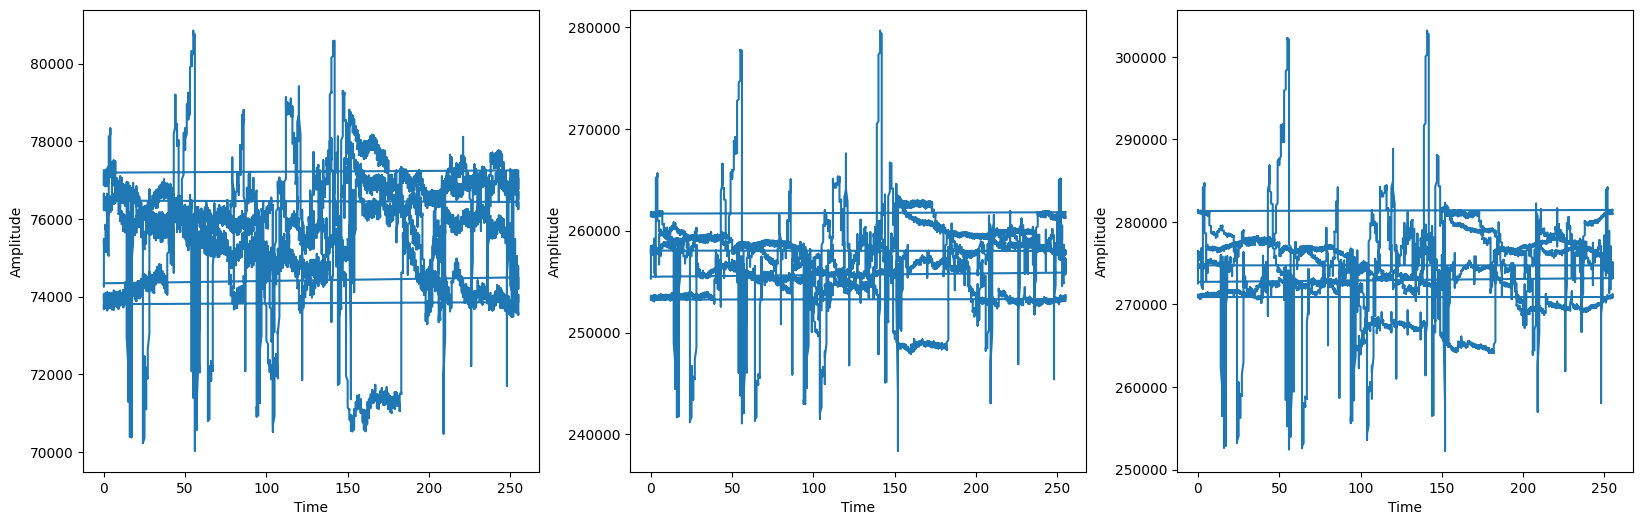

In [41]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.plot(data['Unnamed: 1'])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(1,3,2)
plt.plot(data['Unnamed: 2'])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(1,3,3)
plt.plot(data['Unnamed: 3'])
plt.xlabel('Time')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

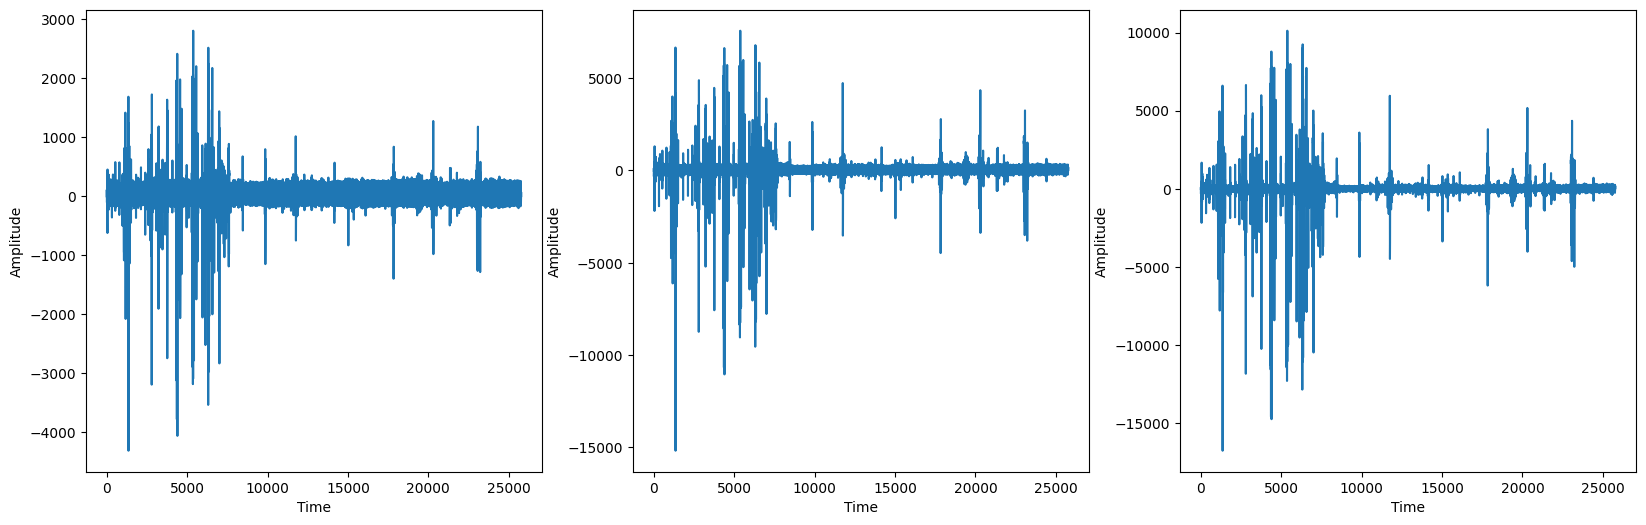

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.plot(nk.ppg_clean(data['Unnamed: 1'][10000:], 25, method='elgendi'))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(1,3,2)
plt.plot(nk.ppg_clean(data['Unnamed: 2'][10000:], 25, method='elgendi'))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(1,3,3)
plt.plot(nk.ppg_clean(data['Unnamed: 3'][10000:], 25, method='elgendi'))
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [47]:
nk_cleaned = {
              'Channel 1' : nk.ppg_clean(data['Unnamed: 1']), 
              'Channel 2' : nk.ppg_clean(data['Unnamed: 2']),
              'Channel 3' : nk.ppg_clean(data['Unnamed: 3']),                          
            }

/home/ifire/.local/lib/python3.10/site-packages/neurokit2/ppg/ppg_clean.py:73: NeuroKitWarning: There are 1 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(


In [51]:
max(nk_cleaned['Channel 1'])

6055.941514544054

/home/ifire/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Spectrum (ms2/Hz)')

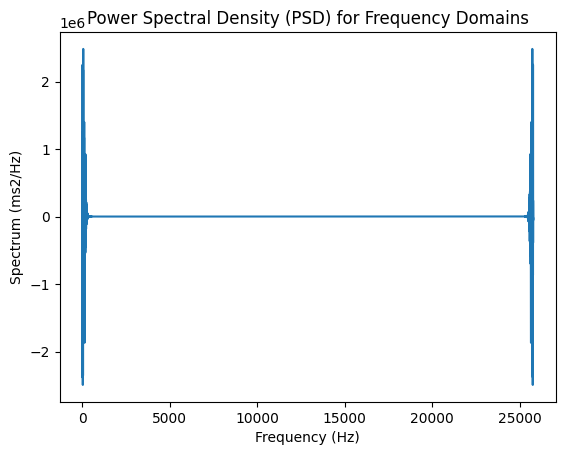

In [ ]:
fft = np.fft.fft(nk.ppg_clean(data['Unnamed: 1']))
plt.plot(fft)
plt.title('Power Spectral Density (PSD) for Frequency Domains')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectrum (ms2/Hz)')

/home/ifire/.local/lib/python3.10/site-packages/neurokit2/ppg/ppg_clean.py:73: NeuroKitWarning: There are 1 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(
/home/ifire/.local/lib/python3.10/site-packages/neurokit2/ppg/ppg_clean.py:73: NeuroKitWarning: There are 1 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(
/home/ifire/.local/lib/python3.10/site-packages/neurokit2/ppg/ppg_clean.py:73: NeuroKitWarning: There are 1 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(


,Hz_0_10
0,1.864597


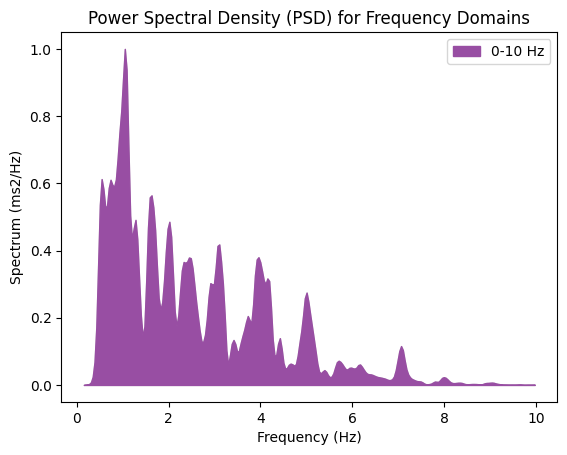

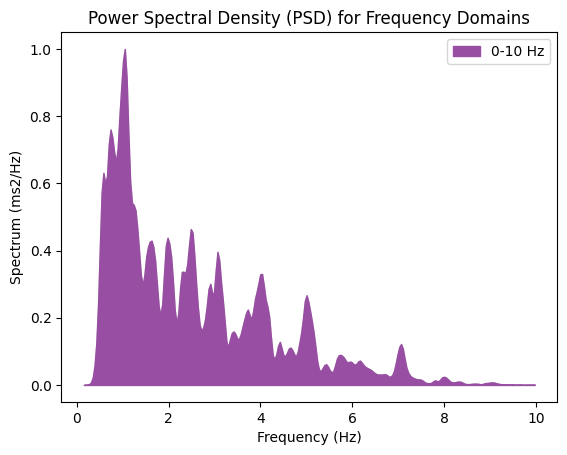

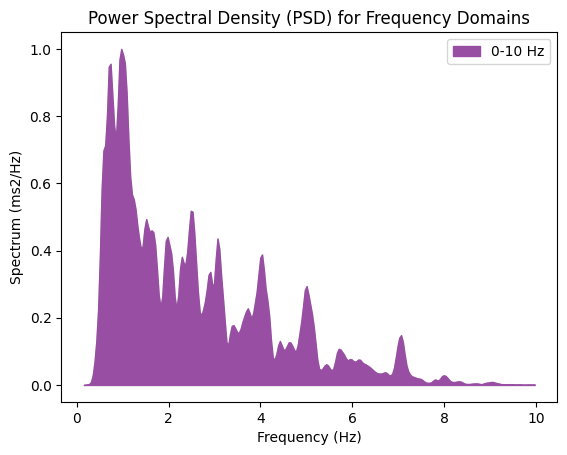

In [ ]:
signal = nk.signal_simulate(frequency=5) + 0.5*nk.signal_simulate(frequency=20)
power_plot1 = nk.signal_power(nk.ppg_clean(data['Unnamed: 1']), frequency_band=[(0, 10)], method="welch", show=True)
power_plot2 = nk.signal_power(nk.ppg_clean(data['Unnamed: 2']), frequency_band=[(0, 10)], method="welch", show=True)
power_plot3 = nk.signal_power(nk.ppg_clean(data['Unnamed: 3']), frequency_band=[(0, 10)], method="welch", show=True)
power_plot1
power_plot2
power_plot3

## unfiltered compression PPG data

In [15]:
data =  data.dropna(inplace=False)
data.head()


,Unnamed: 1,Unnamed: 2,Unnamed: 3
1649438306,,,
98,74722.0,252665.0,264880.0
98,74761.0,252726.0,264924.0
98,74801.0,252745.0,264944.0
98,74787.0,252654.0,264851.0
98,74706.0,252366.0,264568.0


histograms of the each channels

In [ ]:
def compression_ratio(ppg_raw: np.ndarray, raw_file_size: float) -> None:
    min_val = abs(ppg_raw.min())
    non_neg_val = ppg_raw + min_val + 1
    
    np_non_neg_val = np.array(non_neg_val)
    k_min = math.floor(math.log2((2/3) * (np_non_neg_val.mean() + 1)))
    k_max = math.ceil(math.log2(np_non_neg_val.mean()))
    numerator = math.log10((math.sqrt(5) + 1) / 2 - 1)
    denominator = np.log10(np_non_neg_val.mean() / (np_non_neg_val.mean() + 1))
    k_geo = 1 + math.floor(math.log2(numerator / denominator))
    
    k_dict = {'k_min': k_min, 'k_max': k_max, 'k_geo': k_geo}
    
    non_neg_int_val = [int(val) for val in non_neg_val]
    print(k_dict)
    pass

    for x, y in k_dict.items():
        temp_code_words = [encode(val, y) for val in non_neg_int_val]  # Assuming encode is defined
        
        file_name = f'code_non_filter_words_channel_4_{x}.txt'
        with open(file_name, 'w') as file:
            for val in temp_code_words:
                file.write(val + "\n")
        temp_code_words = []
                
    for x in k_dict.keys():
        file_name = f'code_non_filter_words_channel_4_{x}.txt'
        file_size = os.path.getsize(file_name)
        print(f'the file size of the {x} is {file_size}')
        print(f'the compression ratio for {x} is {file_size / raw_file_size}')


numpy.ndarray